In [1]:
import numpy as np
import scipy.special as ss
import matplotlib.pyplot as plt

### 前提
我们假设任一的马尔科夫链具有 $[0, 1]$ 区间上的无限的状态，转移矩阵为 $P$，满足 $P_{ij}=P_{ji}$（对称阵）。在下面的描述及实现中，其实我们并不需要关于 P 的任何信息。

### 简单提一下关于Beta分布
密度函数是：
\begin{split} f(x;a, b)=&\textrm{constant}\cdot x^{\alpha-1}(1-x)^{\beta-1}\\ =&\frac{x^{\alpha-1}(1-x)^{\beta-1}}{B(a,b)} \end{split}

实际意义我们先不管，我们只是知道了这样一个pdf，然后要对它进行采样



### 采样步骤
1. 初始化马氏链 Initial State（初始状态） $i\sim U(0, 1)$
2. 随机在转移矩阵 P的 第 i 行（表示从当前状态 i 出发可能到达的状态）中选择一个新的状态j。简单起见我们选择 $j\sim U(0,1)$
3. 计算接受概率（Acceptance Probability）（本质仍然是一种舍选）： 
$\alpha_{ij}=\min\{\frac{s_jP_{ji}}{s_iP_{ij}}, 1\}$

4. 有了前述的 $P_{ij}=P_{ji}$ 的约束，对 $\alpha_{ij}$的定义可简化为： 
$\alpha_{ij}=\min\{\frac{s_j}{s_i}, 1\}$
其中，$s_i=Ci^{a-1}(1-i)^{b-1},\;s_j=Cj^{a-1}(1-j)^{b-1}$，

In [2]:
def beta_s(x, a, b):
    return x**(a-1)*(1-x)**(b-1)
# Beta distribution的概率密度函数（pdf）
def beta(x, a, b):
    return beta_s(x, a, b)/ss.beta(a, b)

In [4]:
def plot_mh(a, b):
    cur = np.random.rand()
    # 取一个初始化的状态
    states = [cur]
    for i in range(10**6):
        # 选择一个新的 Proposal State
        next = np.random.rand()
        u = np.random.rand()
        if u < np.min((beta_s(next, a, b)/beta_s(cur, a, b), 1)):
            states.append(next)
            cur = next
    x = np.arange(0, 1, .01)
    plt.figure(figsize=(10, 5))
    plt.plot(x, beta(x, a, b), lw=2, label='real dist: a={}, b={}'.format(a, b))
    plt.hist(states[-1000:], 25, density=True, label='simu mcmc: a={}, b={}'.format(a, b))
    plt.show()

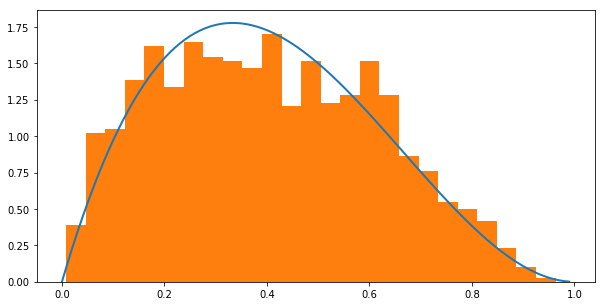

Wall time: 9.65 s


In [5]:
%%time
plot_mh(2, 3)